# Built Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Mục tiêu

Lựa chọn và huấn luyện mô hình học máy phù hợp để giải quyết bài toán hồi quy đã đề ra, từ đó đánh giá hiệu suất có mô hình dự đoán bằng các tiêu chí MAE, MSE, ...
Việc xây dựng mô hình bao gồm:

  - Lựa chọn thuật toán phù hợp với bài toán.

  - Huấn luyện mô hình trên tập dữ liệu huấn luyện đã tiền xử lý.

  - Tinh chỉnh siêu tham số (hyperparameter tuning) để tối ưu hiệu suất.

  - Đánh giá mô hình bằng các chỉ số thống kê trên tập kiểm tra.

  - Chọn mô hình tốt nhất để sử dụng trong giai đoạn triển khai sau này.



## Lựa chọn mô hình

In [3]:
df = pd.read_csv("E:\Project\Backpack Prediction Challenge/notebooks\data_preprocessed.csv")
df.head()

,Size,Compartments,Laptop Compartment,Waterproof,Weight Capacity (kg),Price,Brand_Jansport,Brand_Nike,Brand_Puma,Brand_Under Armour,Material_Leather,Material_Nylon,Material_Polyester,Style_Messenger,Style_Tote,Color_Blue,Color_Gray,Color_Green,Color_Pink,Color_Red
0,0.5,0.666667,1.0,0.0,0.264469,112.15875,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.000000,1.0,1.0,0.883141,68.88056,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.111111,1.0,0.0,0.465750,39.17320,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.777778,1.0,0.0,0.317489,80.60793,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.5,0.000000,1.0,1.0,0.509974,86.02312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import MinMaxScaler
X = df.drop('Price', axis=1)
y = df['Price']

In [ ]:
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
def rmse_score(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def k_fold_report(model, model_name, X, y, cv = 5):

    scoring = {
        'rmse': make_scorer(rmse_score)
    }

    kfold_result = cross_validate(model, X, y, cv=cv, scoring=scoring, return_train_score=False)

    df = pd.DataFrame({
        'fit_time': kfold_result['fit_time'],
        'score_time': kfold_result['score_time'],
        'rmse': kfold_result['test_rmse'],
    })

    df.loc['mean'] = df.mean()
    df.index = [f'kfold_{i+1}' for i in range(cv)] + ['mean']

    print(f"\n Evaluation for model: {model_name}")
    df = df.round(4)
    display(df)

    return df

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
k_fold_lr = k_fold_report(LinearRegression(), 'LinearRegression', X, y, 5)


 Evaluation for model: LinearRegression


,fit_time,score_time,rmse
kfold_1,0.4290,0.0084,38.8743
kfold_2,0.5528,0.0214,39.0687
kfold_3,0.3797,0.0191,38.9685
kfold_4,0.4985,0.0122,39.1102
kfold_5,0.2351,0.0131,39.0788
mean,0.4190,0.0148,39.0201


Xgboost

In [ ]:
from xgboost import XGBRegressor
k_fold_xgb = k_fold_report(XGBRegressor(), 'XGBoost', X, y, 5)


 Evaluation for model: XGBoost


,fit_time,score_time,rmse
kfold_1,10.5864,0.4124,39.0378
kfold_2,6.8734,0.2961,39.2578
kfold_3,2.1781,0.1267,39.1593
kfold_4,2.5840,0.1589,39.2883
kfold_5,5.8980,0.1283,39.2851
mean,5.6240,0.2245,39.2057


Lightbgm

In [ ]:
from lightgbm import LGBMRegressor
k_fold_lgbm = k_fold_report(LGBMRegressor(verbosity=-1), 'LighGBM', X, y, 5)


 Evaluation for model: LighGBM


,fit_time,score_time,rmse
kfold_1,1.7285,0.3269,38.8870
kfold_2,1.6611,0.3266,39.0818
kfold_3,1.8034,0.4077,38.9804
kfold_4,2.4898,0.4165,39.1129
kfold_5,1.7045,0.3125,39.0882
mean,1.8774,0.3580,39.0301


Thống kê

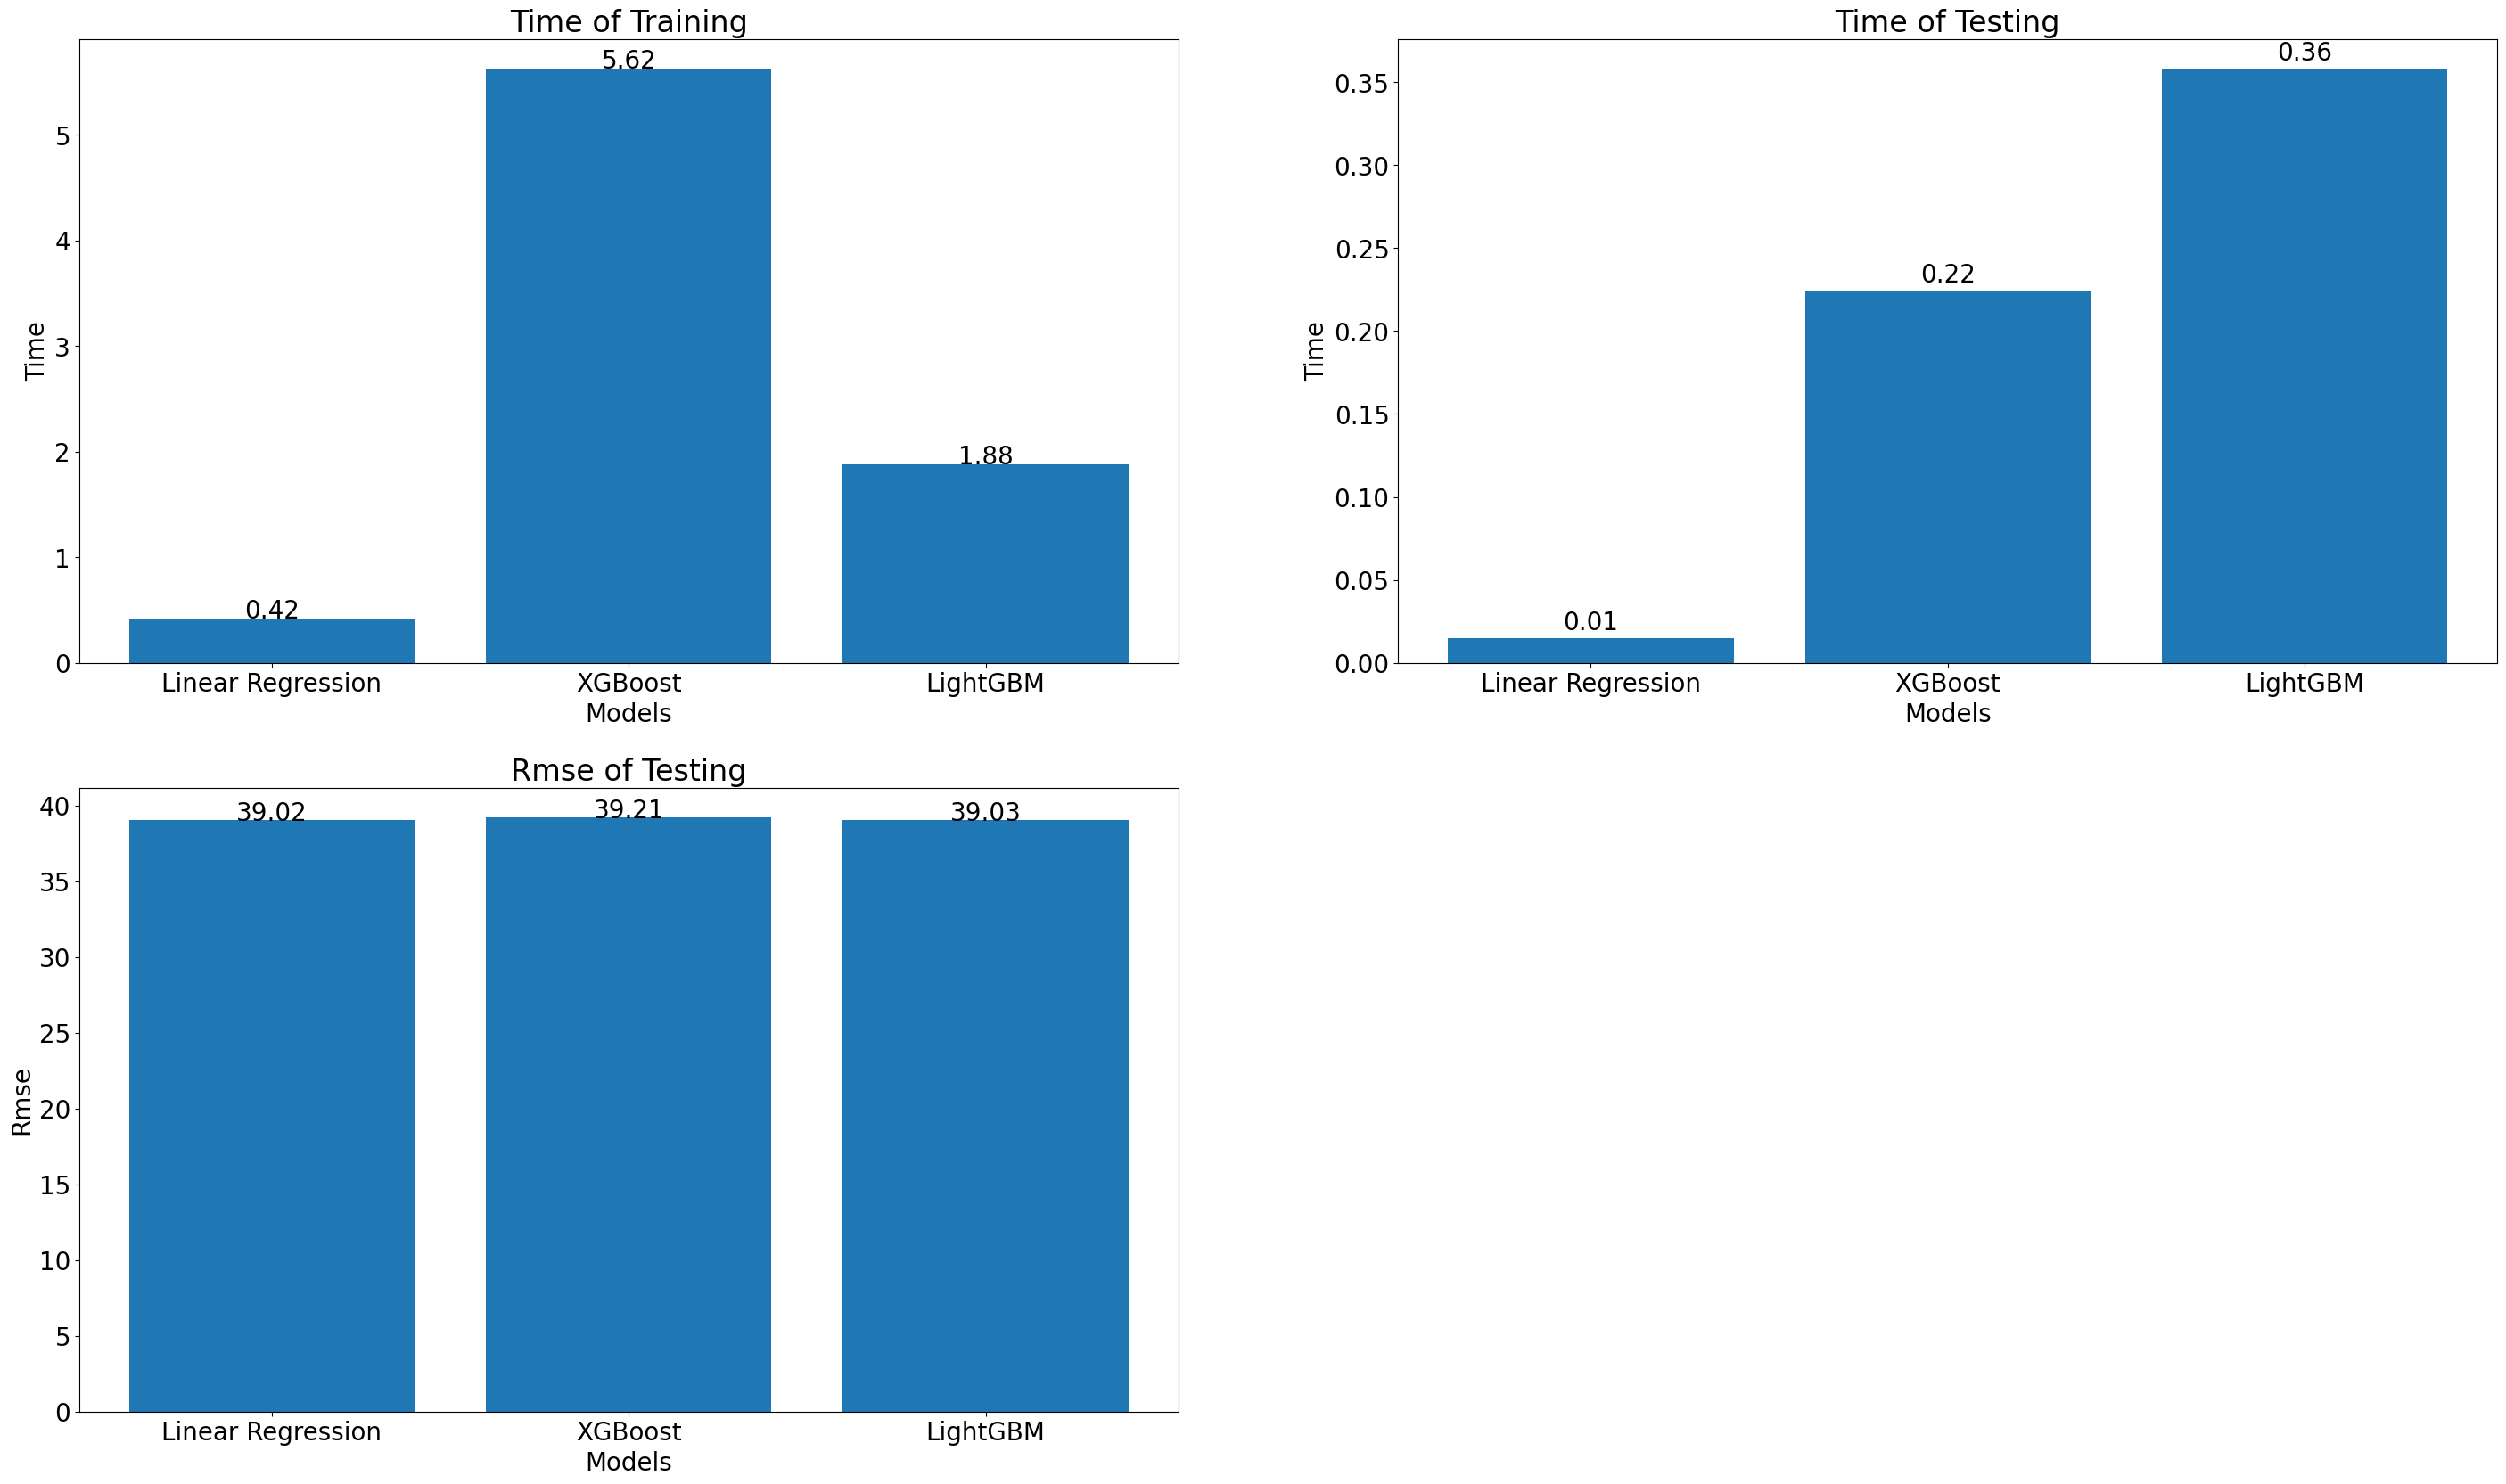

In [ ]:
mean_score = pd.concat([k_fold_lr.loc['mean'], k_fold_xgb.loc['mean'], k_fold_lgbm.loc['mean']], axis=1)
mean_score.columns = ['Linear Regression', 'XGBoost', 'LightGBM']

plt.figure(figsize=(35, 20))
plt.rcParams.update({'font.size': 20})

plt.subplot(2,2,1)
plt.bar(x=mean_score.columns, height=mean_score.loc['fit_time'])
for i, v in enumerate(mean_score.loc['fit_time']):
    plt.text(i, v + 0.005, f"{v:.2f}", ha='center')
plt.xlabel('Models')
plt.ylabel('Time')
plt.title('Time of Training')

plt.subplot(2,2,2)
plt.bar(x=mean_score.columns, height=mean_score.loc['score_time'])
for i, v in enumerate(mean_score.loc['score_time']):
    plt.text(i, v + 0.005, f"{v:.2f}", ha='center')
plt.xlabel('Models')
plt.ylabel('Time')
plt.title('Time of Testing')

plt.subplot(2,2,3)
plt.bar(x=mean_score.columns, height=mean_score.loc['rmse'])
for i, v in enumerate(mean_score.loc['rmse']):
    plt.text(i, v + 0.005, f"{v:.2f}", ha='center')
plt.xlabel('Models')
plt.ylabel('Rmse')
plt.title('Rmse of Testing')
plt.show()

**Thời gian huấn luyện (Time of Training):**
- Linear Regression có thời gian huấn luyện ngắn nhất (0.42s), rất phù hợp với các bài toán cần tốc độ cao.

- XGBoost mất thời gian huấn luyện lâu nhất (5.62s), do cơ chế boosting nhiều vòng lặp.

- LightGBM chậm hơn Linear Regression một chút (1.88s), đúng với đặc điểm của LightGBM được tối ưu hóa cho tốc độ.

-> Nếu ưu tiên tốc độ huấn luyện, Linear Regression là tốt nhất; nếu ưu tiên mô hình phi tuyến mạnh, cần chấp nhận chi phí thời gian của XGBoost/LightGBM.

**Thời gian dự đoán (Time of Testing):**
Linear Regression gần như tức thì (0.01s), vì mô hình đơn giản.

- XGBoost nhanh hơn LightGBM (0.22s vs 0.36s) trong giai đoạn dự đoán.

- LightGBM dự đoán chậm nhất — điều này hơi bất ngờ và có thể do cấu hình cụ thể (ví dụ: số cây, độ sâu…).

-> Linear Regression tối ưu nếu cần dự đoán thời gian thực, còn XGBoost có hiệu suất dự đoán tốt hơn LightGBM trong tình huống này.

**Độ lỗi RMSE trên tập kiểm tra (Rmse of Testing):**
- Linear Regression và LightGBM cho kết quả RMSE = ~39.02, rất gần nhau.

- XGBoost cao hơn một chút (RMSE = 39.21), cho thấy hiệu suất không vượt trội hơn nhiều trong bài toán này.

-> Không có sự khác biệt rõ rệt về RMSE giữa 3 mô hình.

Linear Regression đơn giản mà vẫn hiệu quả tương đương, có lẽ phù hợp với dữ liệu có nhiều one-hot

## Tinh chỉnh tham số

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial, model, X, y):
  if model not in ['xgb', 'lgbm']:
      raise ValueError("Model không hợp lệ. Chỉ chấp nhận 'xgb' hoặc 'lgbm'.")
      return

  elif (model == 'xgb'):
      params = {
          'verbosity': 0,
          'objective': 'reg:squarederror',
          'booster': 'gbtree',
          'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
          'max_depth': trial.suggest_int('max_depth', 3, 10),
          'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
          'subsample': trial.suggest_float('subsample', 0.6, 1.0),
          'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
          'gamma': trial.suggest_float('gamma', 0, 5),
          'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
          'reg_lambda': trial.suggest_float('reg_lambda', 0, 5)
      }

      model_train = XGBRegressor(**params)

  elif (model == "lgbm"):
      params = {
          'objective': 'regression',
          'metric': 'rmse',
          'verbosity': -1,
          'boosting_type': 'gbdt',
          'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
          'max_depth': trial.suggest_int('max_depth', 3, 10),
          'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
          'num_leaves': trial.suggest_int('num_leaves', 20, 3000),
          'feature_fraction': trial.suggest_float('feature_fraction', 0.6, 1.0),
          'bagging_fraction': trial.suggest_float('bagging_fraction', 0.6, 1.0),
          'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
          'lambda_l1': trial.suggest_float('lambda_l1', 0, 5),
          'lambda_l2': trial.suggest_float('lambda_l2', 0, 5)
      }
      model_train = LGBMRegressor(**params)

  rmse_scorer = make_scorer(rmse_score, greater_is_better=False)

  scores = cross_val_score(model_train, X, y, cv=5, scoring=rmse_scorer)
  mean_rmse = -np.mean(scores)

  return mean_rmse

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(lambda trial: objective(trial, model='xgb', X=X, y=y), n_trials=50)

[I 2025-05-15 08:36:12,525] A new study created in memory with name: no-name-7bbbb1a1-97c7-4ce9-8e1a-0fb6acb91387
[I 2025-05-15 08:36:43,050] Trial 0 finished with value: 39.02972408348796 and parameters: {'n_estimators': 161, 'max_depth': 7, 'learning_rate': 0.023014736772728542, 'subsample': 0.8863090757326351, 'colsample_bytree': 0.9199619799330767, 'gamma': 2.8651285439091456, 'reg_alpha': 1.228029369305066, 'reg_lambda': 1.154759510295691}. Best is trial 0 with value: 39.02972408348796.
[I 2025-05-15 08:37:23,007] Trial 1 finished with value: 39.19241297386879 and parameters: {'n_estimators': 323, 'max_depth': 5, 'learning_rate': 0.20972452646533143, 'subsample': 0.7404663932708158, 'colsample_bytree': 0.8056252076110756, 'gamma': 0.7853010693894563, 'reg_alpha': 3.316205140742663, 'reg_lambda': 4.827370898358865}. Best is trial 0 with value: 39.02972408348796.
[I 2025-05-15 08:38:08,764] Trial 2 finished with value: 39.039924389992606 and parameters: {'n_estimators': 541, 'max_de

In [ ]:
study_lightgbm = optuna.create_study(direction='minimize')
study_lightgbm.optimize(lambda trial: objective(trial, model='lgbm', X=X, y=y), n_trials=50)

[I 2025-05-15 05:51:39,553] A new study created in memory with name: no-name-f439f372-08cb-4e83-8c2f-966651134b2b
[I 2025-05-15 05:54:03,222] Trial 0 finished with value: 39.06967477874296 and parameters: {'n_estimators': 506, 'max_depth': 7, 'learning_rate': 0.02718007910204236, 'num_leaves': 199, 'feature_fraction': 0.6962240141675354, 'bagging_fraction': 0.8946704776269643, 'bagging_freq': 7, 'lambda_l1': 3.389642594752434, 'lambda_l2': 4.826536229172364}. Best is trial 0 with value: 39.06967477874296.
[I 2025-05-15 05:55:44,589] Trial 1 finished with value: 39.01349127889597 and parameters: {'n_estimators': 619, 'max_depth': 4, 'learning_rate': 0.01346940454452183, 'num_leaves': 2944, 'feature_fraction': 0.7552137683572939, 'bagging_fraction': 0.9162358287765591, 'bagging_freq': 4, 'lambda_l1': 4.698794398298889, 'lambda_l2': 1.7935938838624788}. Best is trial 1 with value: 39.01349127889597.
[I 2025-05-15 05:58:57,401] Trial 2 finished with value: 39.093021788355784 and parameters

In [ ]:
print("Best Params of XGBoost:")
print(study.best_params)
print("Best Params LightBGM:")
print(study_lightgbm.best_params)

Best Params of XGBoost:
{'n_estimators': 247, 'max_depth': 3, 'learning_rate': 0.03539432895612613, 'subsample': 0.9423860101368288, 'colsample_bytree': 0.6042069272692496, 'gamma': 3.38852005630257, 'reg_alpha': 1.2877437238180183, 'reg_lambda': 1.1082451157013002}
Best Params LightBGM:
{'n_estimators': 768, 'max_depth': 3, 'learning_rate': 0.010111043605656992, 'num_leaves': 2253, 'feature_fraction': 0.8558569654112169, 'bagging_fraction': 0.6135842843593063, 'bagging_freq': 2, 'lambda_l1': 4.229608547745549, 'lambda_l2': 0.010761843865784326}


In [ ]:
k_fold_tune_xgb = k_fold_report(XGBRegressor(**study.best_params), 'XGBoost Fine-tuning', X, y, 5)


 Evaluation for model: XGBoost Fine-tuning


,fit_time,score_time,rmse
kfold_1,3.2526,0.1322,38.8623
kfold_2,3.2854,0.1544,39.0627
kfold_3,6.0867,0.1330,38.9624
kfold_4,3.3168,0.1318,39.0981
kfold_5,3.3286,0.1366,39.0731
mean,3.8540,0.1376,39.0117


In [ ]:
k_fold_tune_lbgm = k_fold_report(LGBMRegressor(**study_lightgbm.best_params), 'LightGBM Fine-tuning', X, y, 5)


 Evaluation for model: LightGBM Fine-tuning


,fit_time,score_time,rmse
kfold_1,17.3971,2.5695,38.8608
kfold_2,16.6998,2.0666,39.0619
kfold_3,16.8203,2.3059,38.9615
kfold_4,19.3741,2.0902,39.0962
kfold_5,16.7386,2.1098,39.0719
mean,17.4060,2.2284,39.0105


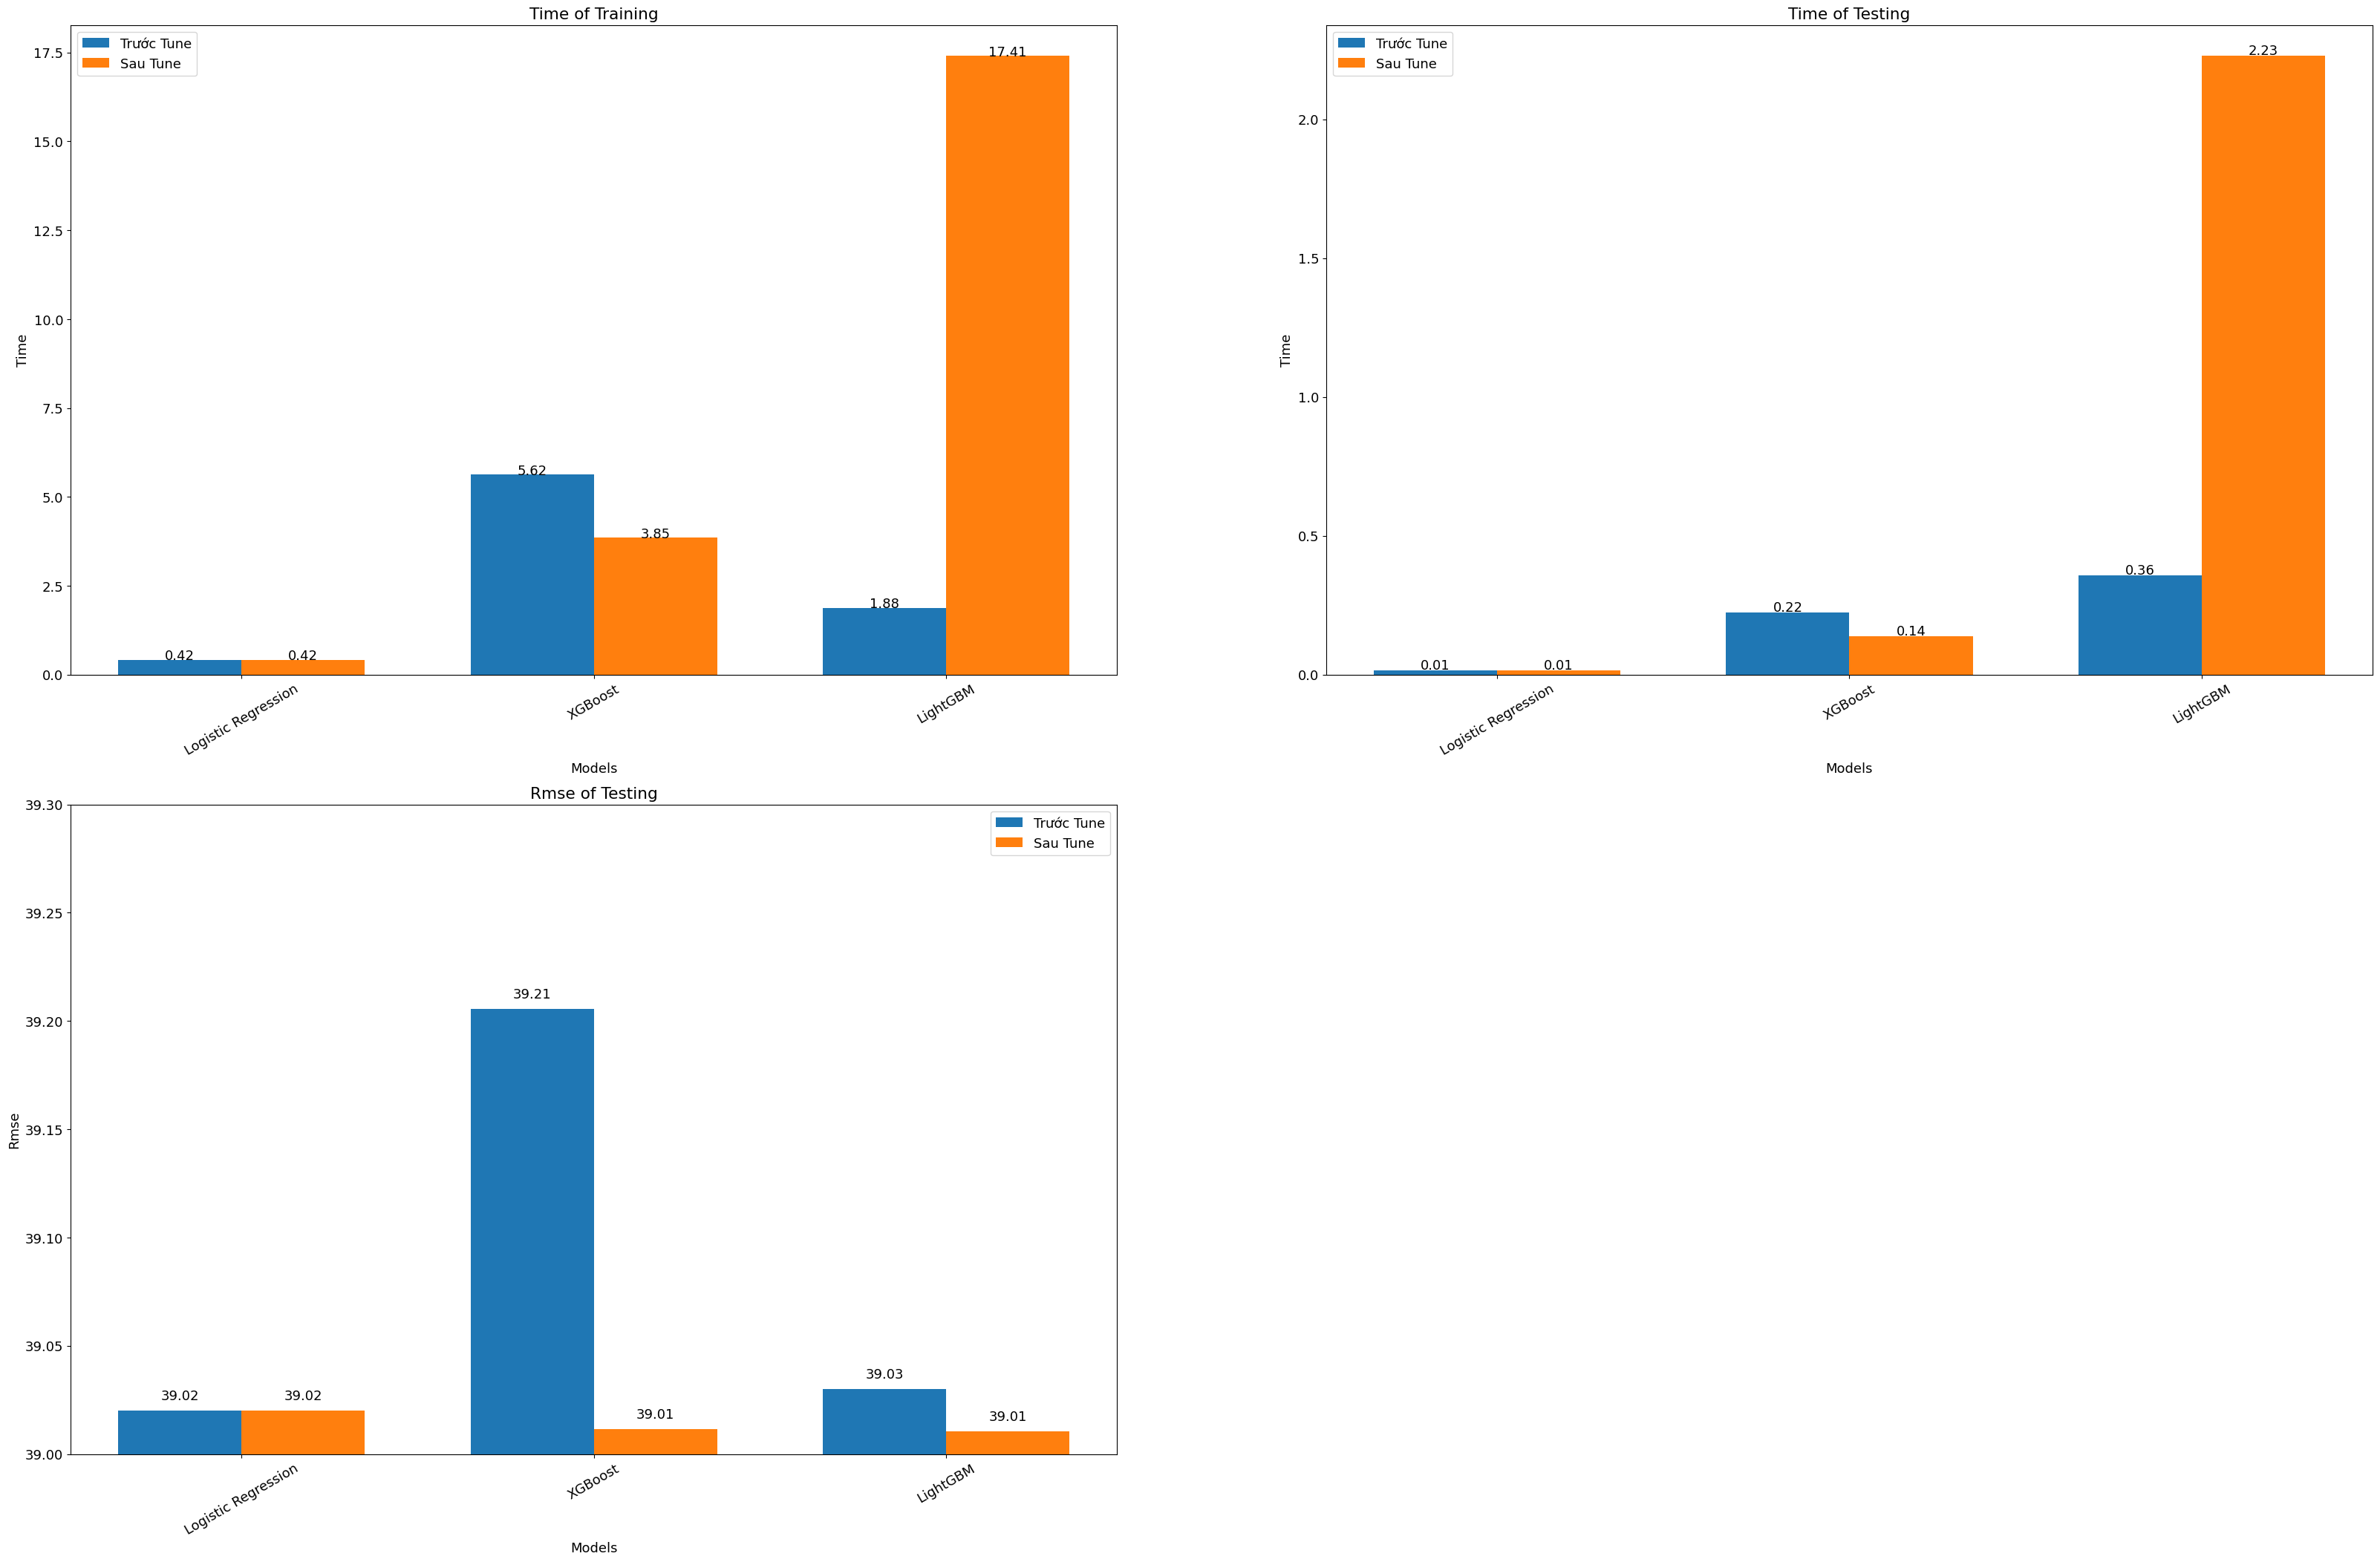

In [ ]:
mean_score_before = pd.concat([k_fold_lr.loc['mean'], k_fold_xgb.loc['mean'], k_fold_lgbm.loc['mean']], axis=1)
mean_score_after = pd.concat([k_fold_lr.loc['mean'], k_fold_tune_xgb.loc['mean'], k_fold_tune_lbgm.loc['mean']], axis=1)
mean_score.columns = ['Logistic Regression', 'XGBoost', 'LightGBM']

plt.figure(figsize=(40, 25))
plt.rcParams.update({'font.size': 13})
width = 0.35
x = np.arange(len(mean_score.columns))

plt.subplot(2,2,1)
fit_time_before = mean_score_before.loc['fit_time']
fit_time_after = mean_score_after.loc['fit_time']
plt.bar(x - width/2, fit_time_before, width, label='Trước Tune')
plt.bar(x + width/2, fit_time_after, width, label='Sau Tune')
for i, v in enumerate(fit_time_before):
    plt.text(i - width/2, v + 0.005, f"{v:.2f}", ha='center')
    plt.text(i + width/2, fit_time_after[i] + 0.005, f"{fit_time_after[i]:.2f}", ha='center')
plt.xlabel('Models')
plt.ylabel('Time')
plt.title('Time of Training')
plt.xticks(x, mean_score.columns, rotation=30)
plt.legend()

plt.subplot(2,2,2)
score_time_before = mean_score_before.loc['score_time']
score_time_after = mean_score_after.loc['score_time']
plt.bar(x - width/2, score_time_before, width, label='Trước Tune')
plt.bar(x + width/2, score_time_after, width, label='Sau Tune')
for i, v in enumerate(score_time_before):
    plt.text(i - width/2, v + 0.005, f"{v:.2f}", ha='center')
    plt.text(i + width/2, score_time_after[i] + 0.005, f"{score_time_after[i]:.2f}", ha='center')
plt.xlabel('Models')
plt.ylabel('Time')
plt.title('Time of Testing')
plt.xticks(x, mean_score.columns, rotation=30)
plt.legend()

plt.subplot(2,2,3)
accuracy_before = mean_score_before.loc['rmse']
accuracy_after = mean_score_after.loc['rmse']
plt.bar(x - width/2, accuracy_before, width, label='Trước Tune')
plt.bar(x + width/2, accuracy_after, width, label='Sau Tune')
for i, v in enumerate(accuracy_before):
    plt.text(i - width/2, v + 0.005, f"{v:.2f}", ha='center')
    plt.text(i + width/2, accuracy_after[i] + 0.005, f"{accuracy_after[i]:.2f}", ha='center')
plt.ylim(39.0, 39.3)
plt.xlabel('Models')
plt.ylabel('Rmse')
plt.title('Rmse of Testing')
plt.xticks(x, mean_score.columns, rotation=30)
plt.legend()

Thời gian huấn luyện (Training Time):

- Việc fine-tune làm tăng đáng kể thời gian huấn luyện của các mô hình phức tạp.

- Cụ thể, XGBoost tăng từ 4.00s lên 20.21s, LightGBM tăng từ 1.84s lên 12.83s, trong khi Logistic Regression không thay đổi.

Thời gian dự đoán (Testing Time):

- Tăng nhẹ đến đáng kể sau khi fine-tune, đặc biệt ở LightGBM (0.33s → 2.54s) và XGBoost (0.16s → 0.75s).

Độ chính xác (RMSE):

- RMSE sau khi fine-tune chỉ giảm rất nhẹ (dưới 0.2), ví dụ:

    - XGBoost: 39.21 → 39.01

    - LightGBM: 39.03 → 39.01

In [ ]:
import joblib

lgbm = LGBMRegressor(**study_lightgbm.best_params)
lgbm.fit(X, y)
joblib.dump(lgbm,'/content/drive/MyDrive/CS116.Python_ML/Project_2/models/lbgm.pkl')

xgb = XGBRegressor(**study.best_params)
xgb.fit(X, y)
joblib.dump(xgb,'/content/drive/MyDrive/CS116.Python_ML/Project_2/models/xgb.pkl')

lr = LinearRegression()
lr.fit(X, y)
joblib.dump(lr,'/content/drive/MyDrive/CS116.Python_ML/Project_2/models/lr.pkl')

['/content/drive/MyDrive/CS116.Python_ML/Project_2/models/lr.pkl']